# Import bibliotek

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, activations
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from PIL import Image

In [2]:
gpus = tf.config.list_physical_devices()
for gpu in gpus:
    print("Name:", gpu.name, "  Type:", gpu.device_type)

Name: /physical_device:CPU:0   Type: CPU
Name: /physical_device:GPU:0   Type: GPU


# Modele

In [3]:
path_model_all_datasets = "../tests/logs/SavedModels/melspec_all_datasets.h5"
# path_model_crema = "../tests/logs/SavedModels/melspec_crema.h5"
path_model_ravdess = "../tests/logs/SavedModels/melspec_ravdess.h5"
path_model_savee = "../tests/logs/SavedModels/melspec_savee.h5"
path_model_tess = "../tests/logs/SavedModels/melspec_tess.h5"

In [4]:
model_all_datasets = models.load_model(filepath=path_model_all_datasets)
# model_crema = models.load_model(filepath=path_model_crema)
model_ravdess = models.load_model(filepath=path_model_ravdess)
model_savee = models.load_model(filepath=path_model_savee)
model_tess = models.load_model(filepath=path_model_tess)

# Dane testowe

In [5]:
test_path_all_datasets = "../data/melspectrograms/all_datasets/test"
test_path_crema = "../data/melspectrograms/divided/Crema/test"
test_path_ravdess = "../data/melspectrograms/divided/Ravdess/test"
test_path_savee = "../data/melspectrograms/divided/Savee/test"
test_path_tess = "../data/melspectrograms/divided/Tess/test"

In [6]:
test_paths = [test_path_all_datasets, test_path_crema, test_path_ravdess, test_path_savee, test_path_tess]

In [7]:
classes = ["Anger", "Happy", "Neutral", "Sad", "Fear", "Disgust"]

In [8]:
def generate_confusion_matrix(model, test_paths):
    fig, axes = plt.subplots(3, 2, figsize=(14, 18))
    
    axes = axes.flatten()

    accuracies = dict()
    
    for i, test_path in enumerate(test_paths):
        test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            test_path,
            labels="inferred",
            label_mode="int",
            class_names=classes,
            image_size=(389, 515),
            batch_size=32,
            shuffle=False
        )
    
        predictions = model.predict(test_dataset)
        predicted_classes = np.argmax(predictions, axis=1)
    
        true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
    
        cm = confusion_matrix(true_labels, predicted_classes)
    
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
        disp.plot(ax=axes[i], cmap=plt.cm.Blues, values_format='d')
        
        dataset_name = test_path.split("/")[-2]
        accuracies[dataset_name] = np.mean(predicted_classes == true_labels)
        
        axes[i].set_title(f"Confusion Matrix for {dataset_name}")
        axes[i].set_xlabel("Predicted Label")
        axes[i].set_ylabel("True Label")
        
    axes[-1].axis('off')
    plt.tight_layout()
    plt.show()

    for dataset, accuracy in accuracies.items():
        print(f"Accuracy for {dataset}: {accuracy*100:.2f}%")

# Test - model all_datasets

Found 2265 files belonging to 6 classes.
 1/71 [..............................] - ETA: 11s

2024-10-29 16:00:10.734272: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


71/71 [==============================] - 37s 527ms/step
Found 1489 files belonging to 6 classes.
47/47 [==============================] - 25s 534ms/step
Found 212 files belonging to 6 classes.
7/7 [==============================] - 3s 547ms/step
Found 84 files belonging to 6 classes.
3/3 [==============================] - 1s 542ms/step
Found 480 files belonging to 6 classes.
15/15 [==============================] - 7s 521ms/step


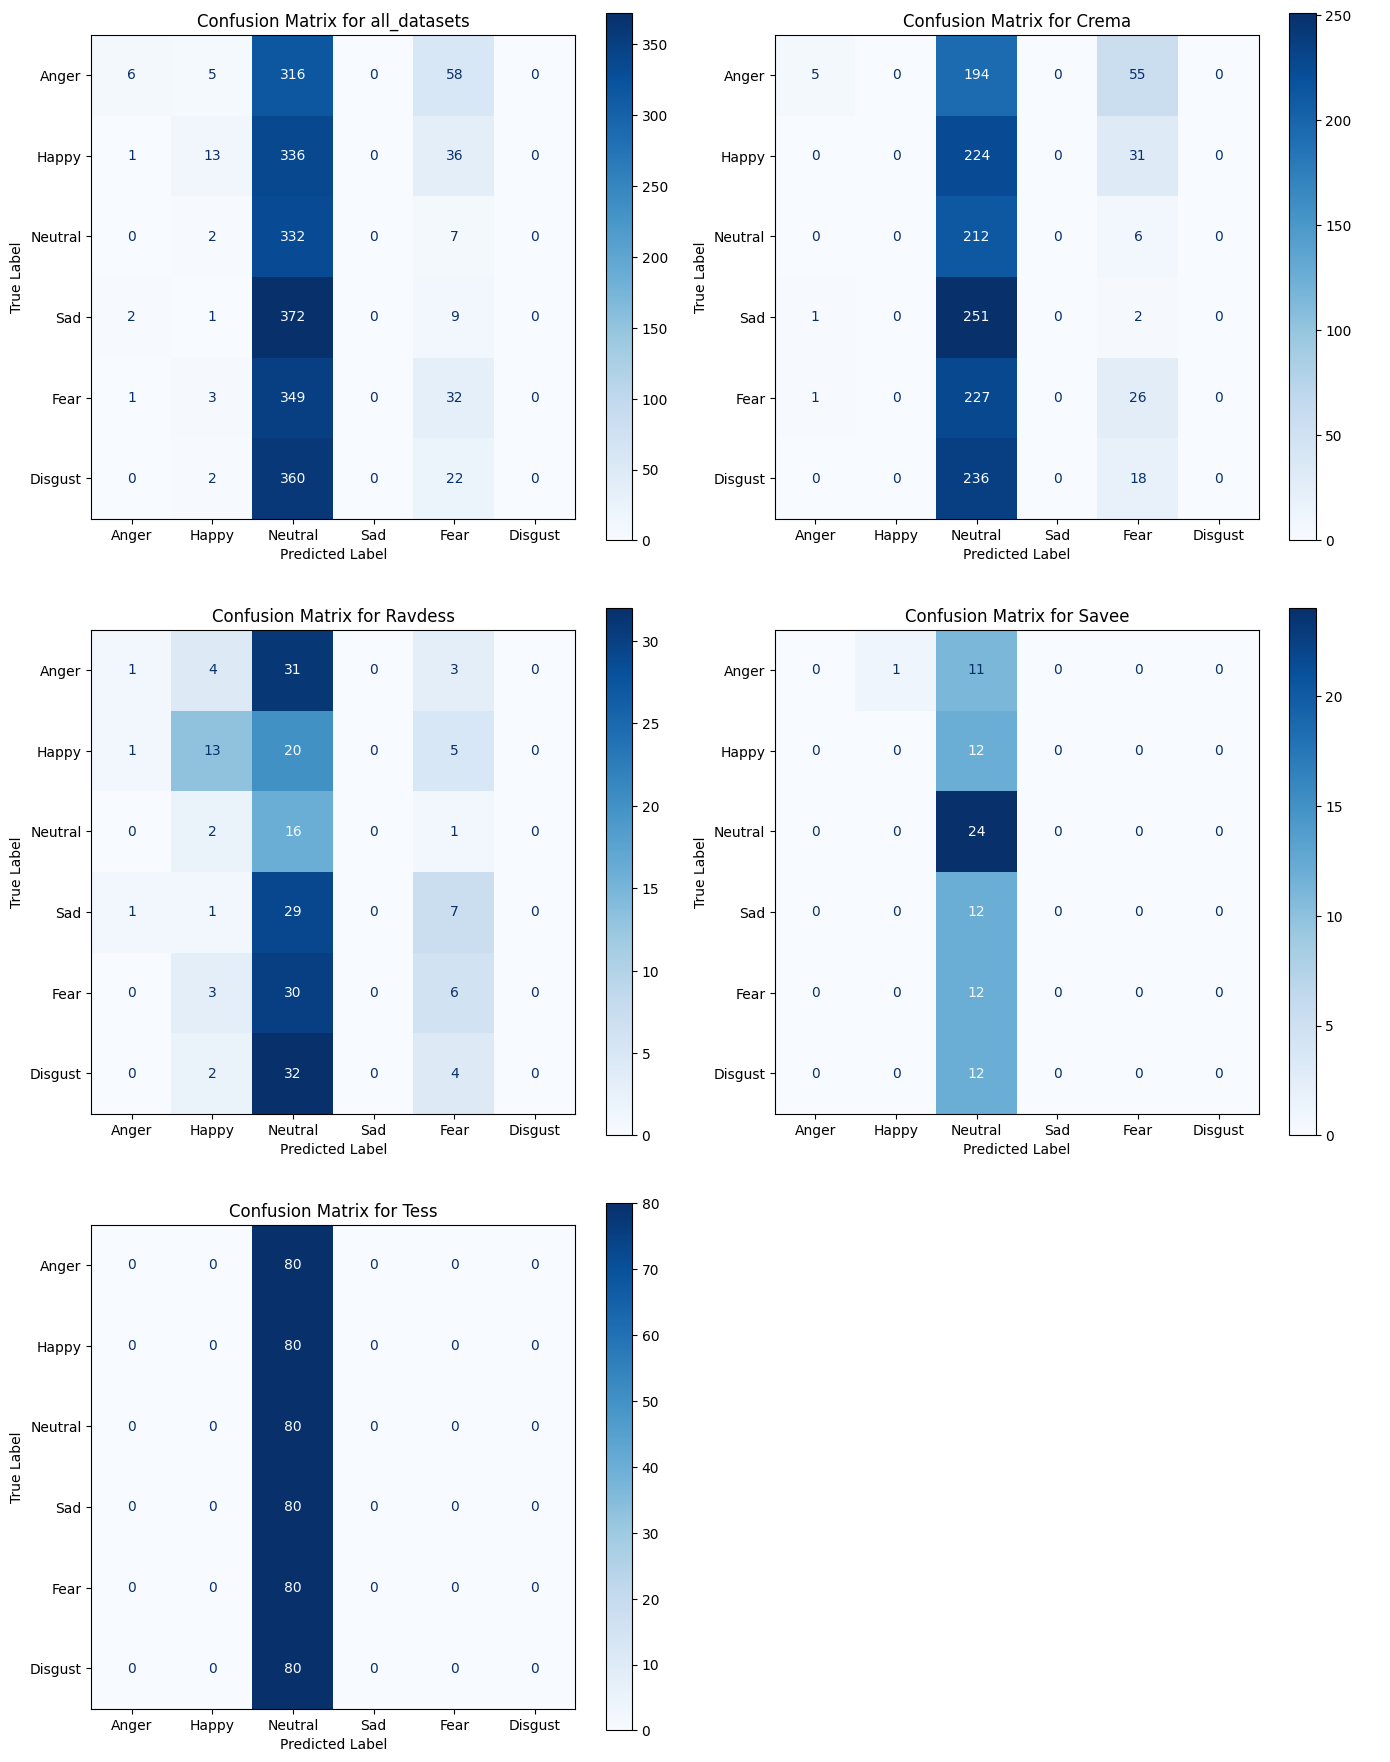

Accuracy for all_datasets: 16.91%
Accuracy for Crema: 16.32%
Accuracy for Ravdess: 16.98%
Accuracy for Savee: 28.57%
Accuracy for Tess: 16.67%


In [9]:
generate_confusion_matrix(model_all_datasets, test_paths)

# Test - model ravdess

Found 2265 files belonging to 6 classes.
71/71 [==============================] - 71s 1s/step
Found 1489 files belonging to 6 classes.
47/47 [==============================] - 51s 1s/step
Found 212 files belonging to 6 classes.
7/7 [==============================] - 7s 1s/step
Found 84 files belonging to 6 classes.
3/3 [==============================] - 2s 1s/step
Found 480 files belonging to 6 classes.
15/15 [==============================] - 13s 956ms/step


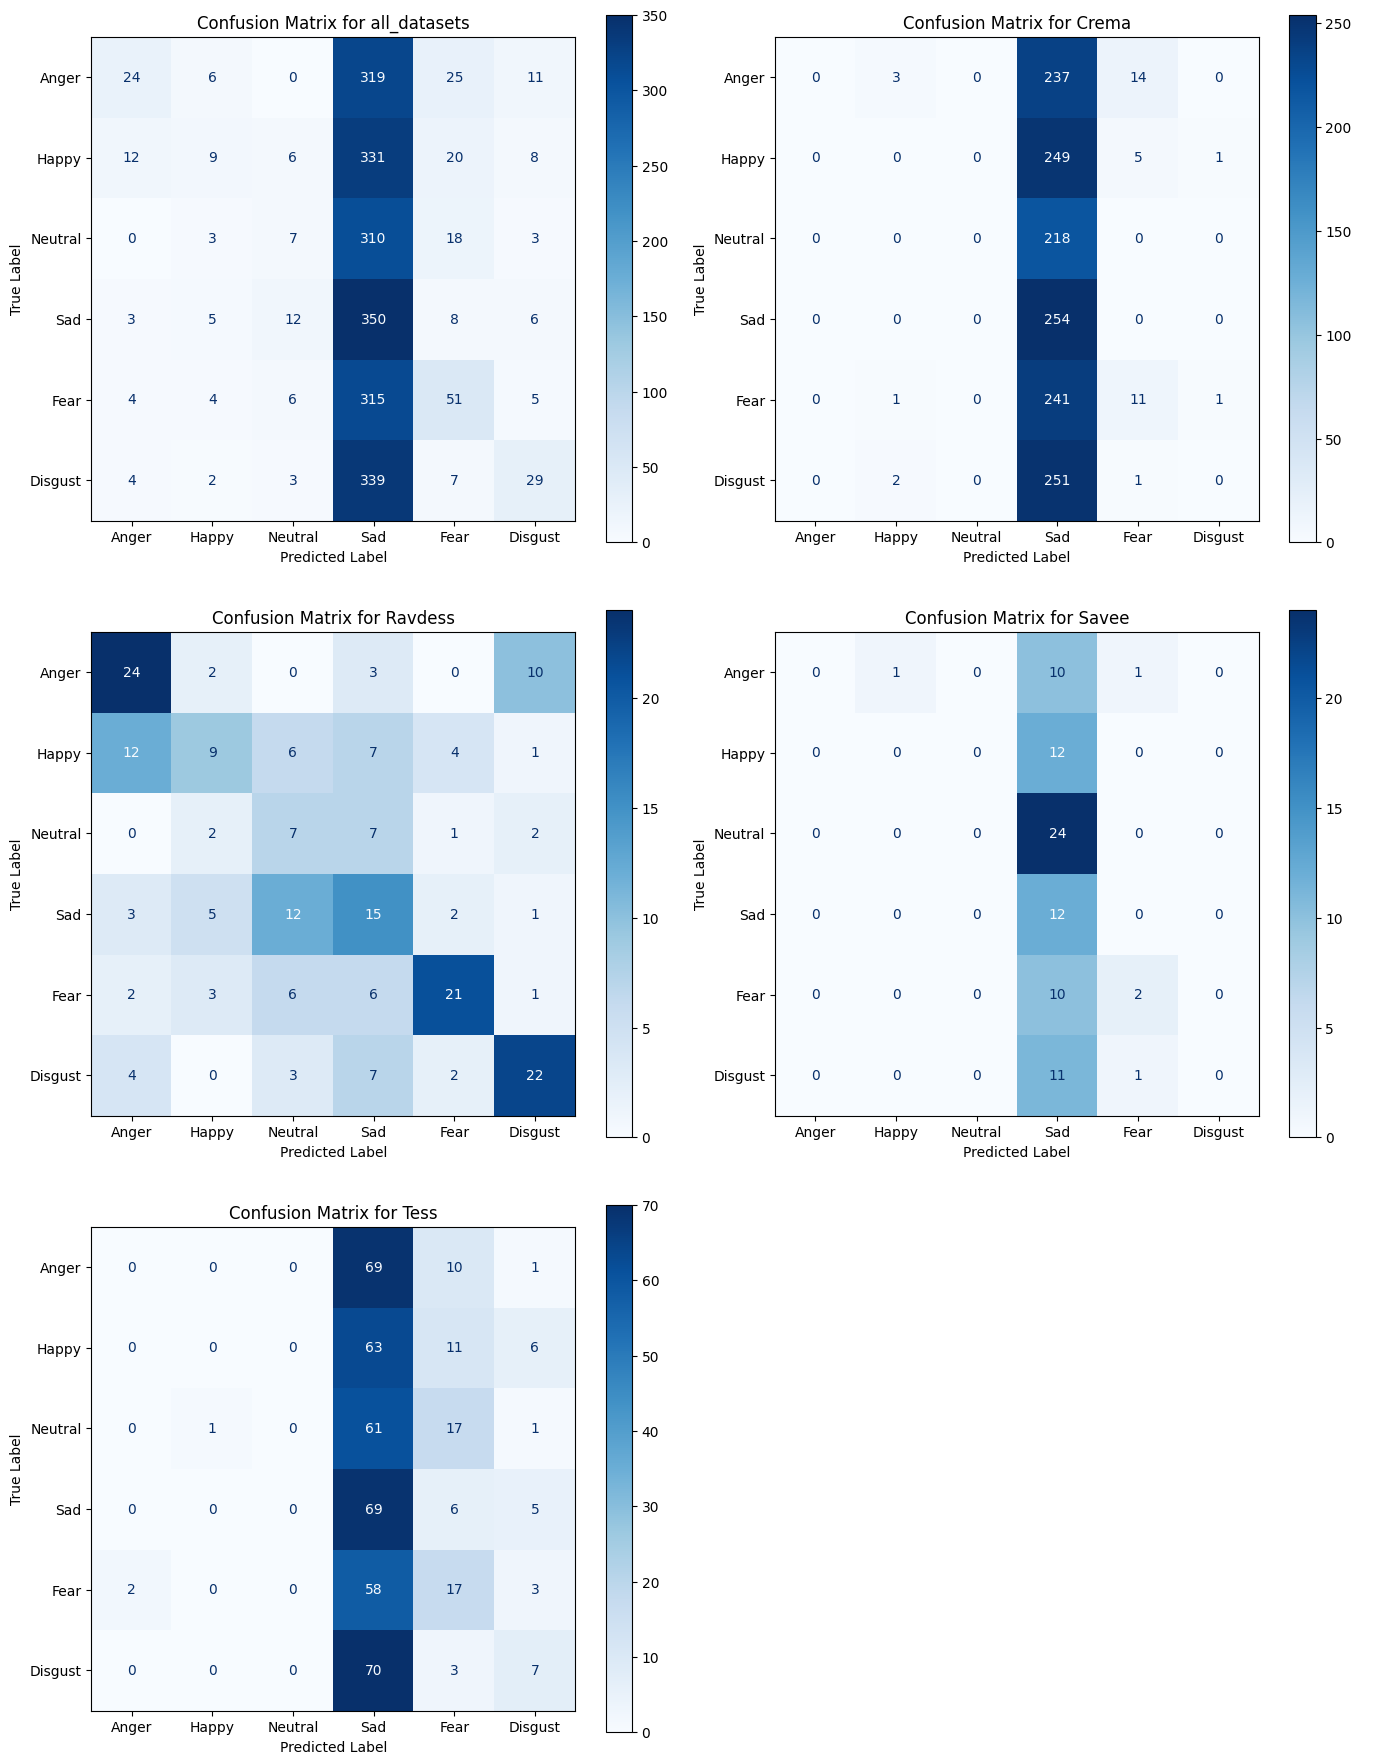

Accuracy for all_datasets: 20.75%
Accuracy for Crema: 17.80%
Accuracy for Ravdess: 46.23%
Accuracy for Savee: 16.67%
Accuracy for Tess: 19.38%


In [10]:
generate_confusion_matrix(model_ravdess, test_paths)

# Test - model savee

Found 2265 files belonging to 6 classes.
71/71 [==============================] - 74s 1s/step
Found 1489 files belonging to 6 classes.
47/47 [==============================] - 44s 962ms/step
Found 212 files belonging to 6 classes.
7/7 [==============================] - 5s 896ms/step
Found 84 files belonging to 6 classes.
3/3 [==============================] - 2s 1s/step
Found 480 files belonging to 6 classes.
15/15 [==============================] - 14s 1s/step


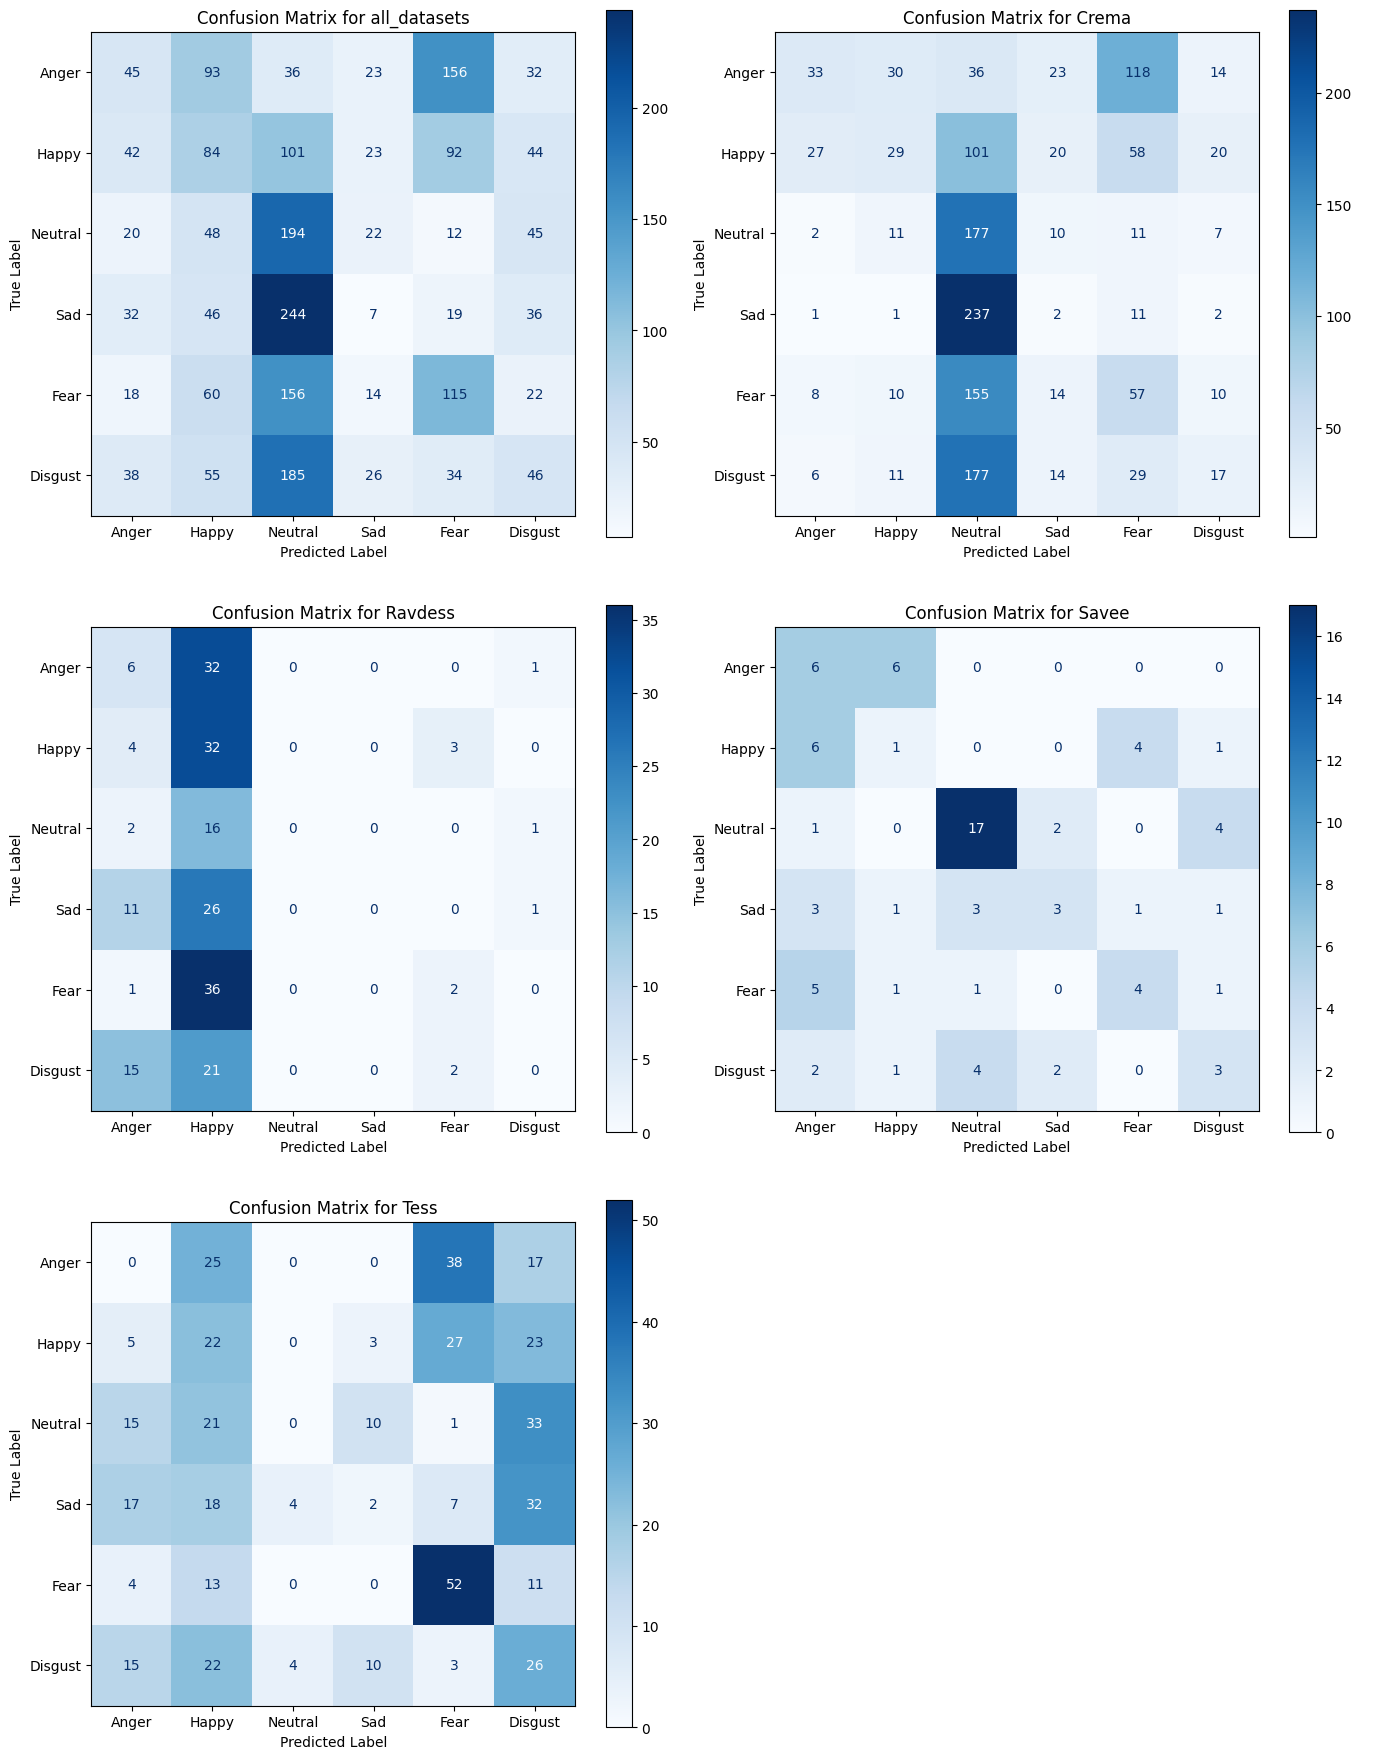

Accuracy for all_datasets: 21.68%
Accuracy for Crema: 21.16%
Accuracy for Ravdess: 18.87%
Accuracy for Savee: 40.48%
Accuracy for Tess: 21.25%


In [11]:
generate_confusion_matrix(model_savee, test_paths)

# Test - model tess

Found 2265 files belonging to 6 classes.
71/71 [==============================] - 70s 999ms/step
Found 1489 files belonging to 6 classes.
47/47 [==============================] - 46s 1s/step
Found 212 files belonging to 6 classes.
7/7 [==============================] - 3s 540ms/step
Found 84 files belonging to 6 classes.
3/3 [==============================] - 1s 558ms/step
Found 480 files belonging to 6 classes.
15/15 [==============================] - 7s 528ms/step


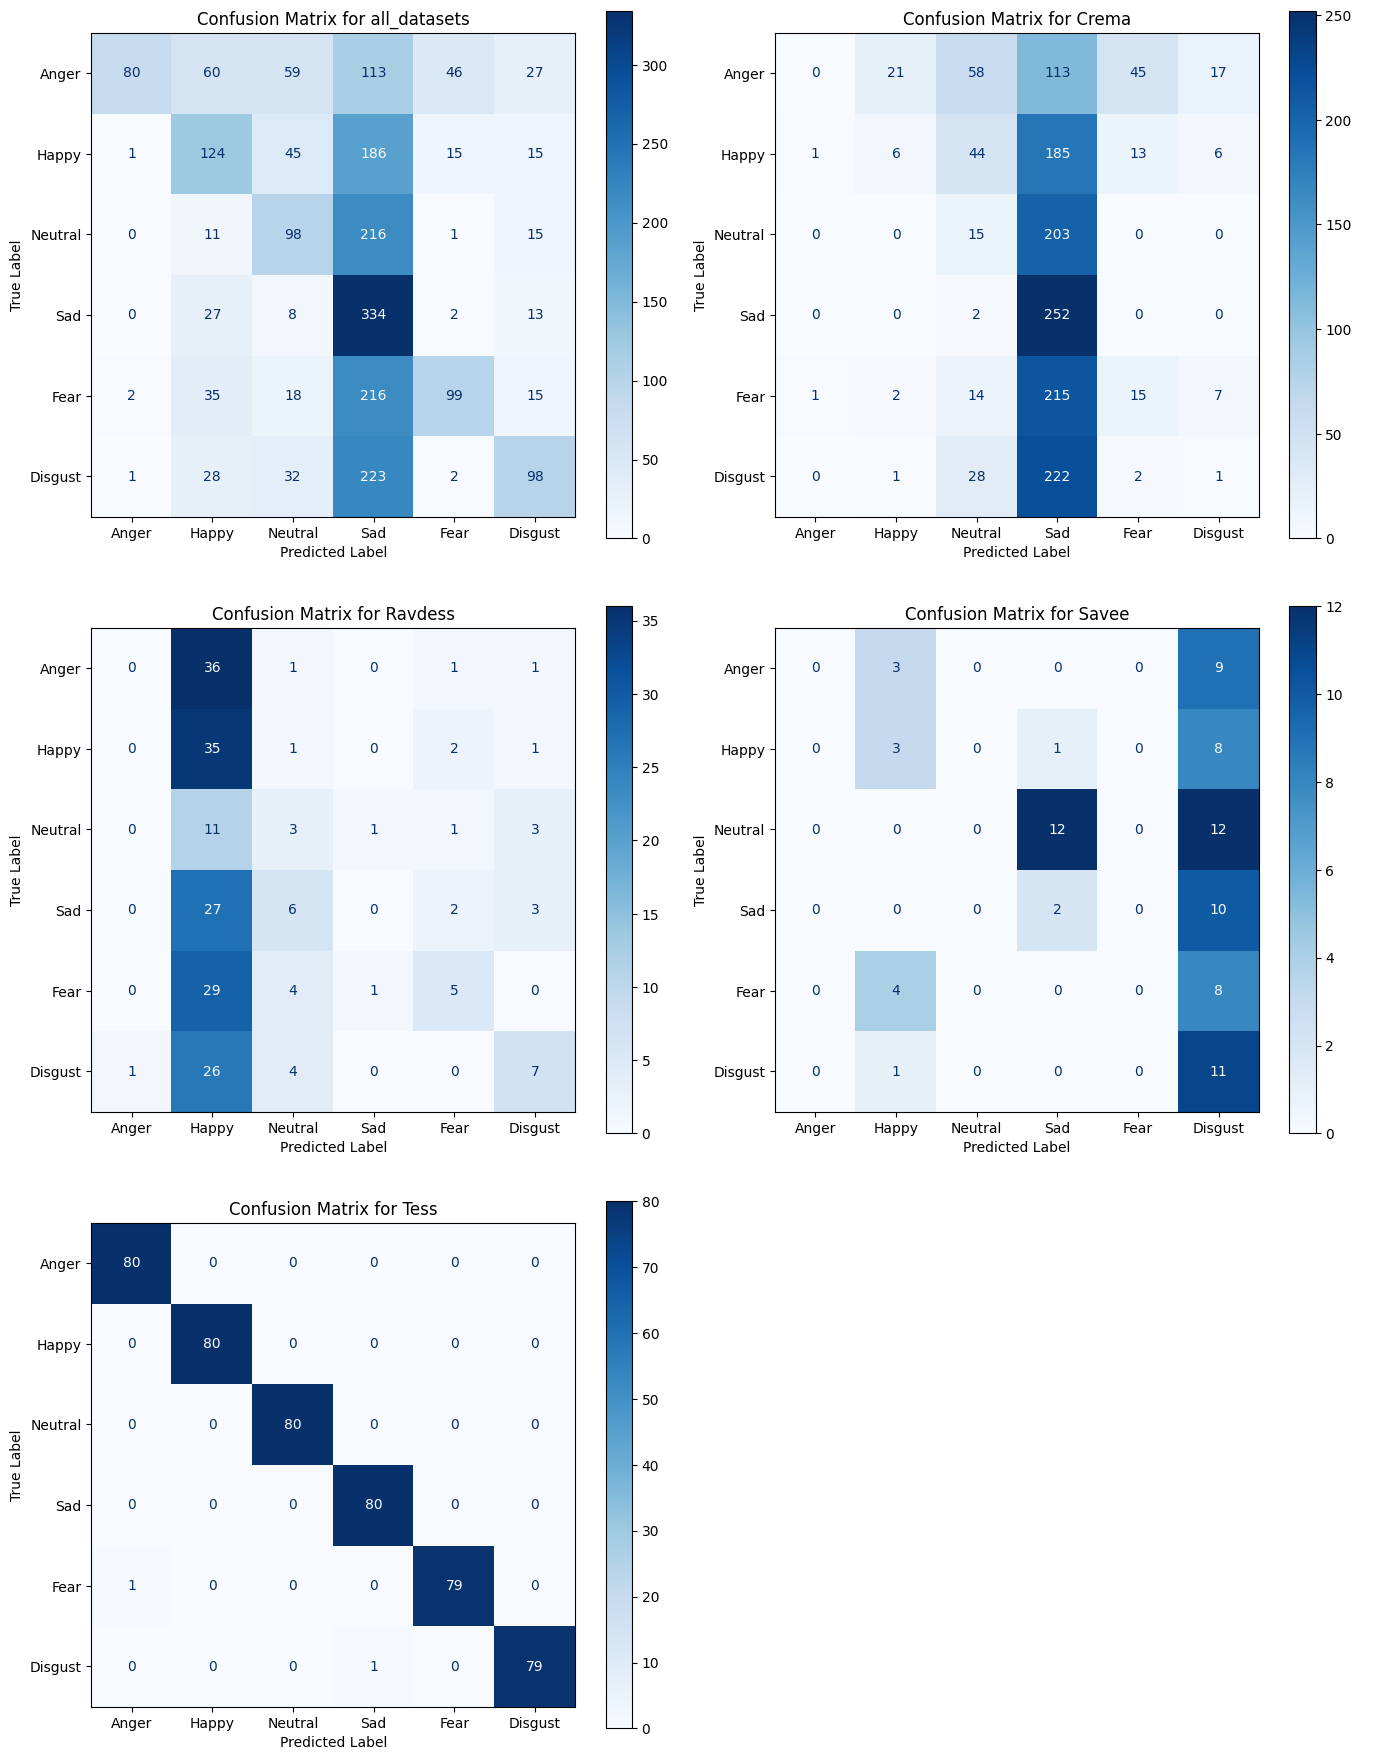

Accuracy for all_datasets: 36.78%
Accuracy for Crema: 19.41%
Accuracy for Ravdess: 23.58%
Accuracy for Savee: 19.05%
Accuracy for Tess: 99.58%


In [12]:
generate_confusion_matrix(model_tess, test_paths)